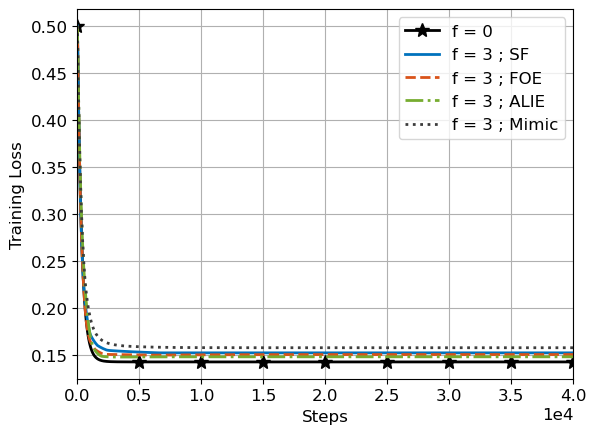

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import csv
import os
from os import listdir
from numpy import genfromtxt
import numpy.linalg as LA
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
plt.rcParams.update({'font.size': 12})

tab_f = [0, 3]
tab_attack = ['SF', 'FOE', 'ALIE', 'mimic']
tab_attack_name = ['SF', 'FOE', 'ALIE', 'Mimic']
tab_sign = ['-', '--', '-.', ':']
colors = [(0, 0.4470, 0.7410), (0.8500, 0.3250, 0.0980), (0.4660, 0.6740, 0.1880), (60/255,60/255, 60/255)]
nb_runs = 5


tab_losses = np.zeros((len(tab_f), len(tab_attack), 40001))
for i, f in enumerate(tab_f):
    for j, attack in enumerate(tab_attack):
        tab_losses[i][j] = genfromtxt('./save_fig1/Losses_'+str(f)+'_'+attack+'.csv', delimiter=',')
        if f == 0:
            break

for a, f in enumerate(tab_f):    
    for b in range(len(tab_attack)):
        if f == 0:
            plt.plot(np.arange(len(tab_losses[a][b])), tab_losses[a][b], marker = '*', markersize=10, markevery=5000, label='f = 0', linestyle = tab_sign[b], color='black', linewidth=2)
            break
        else:
            plt.plot(np.arange(len(tab_losses[a][b])), tab_losses[a][b], label='f = 3 ; '+tab_attack_name[b], linestyle = tab_sign[b], color=colors[b], linewidth=2)

plt.grid()
plt.legend()
plt.xlabel('Steps')
plt.xlim(0,40000)

plt.ylabel('Training Loss')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.savefig('Loss_wrt_attack_8_workers_1_byz.pdf')

In [4]:
def loss_function(theta, X, y, lbda):
    return LA.norm(X@theta - np.reshape(y, (-1,1)))**2/(2*len(X)) + lbda * LA.norm(theta)**2/2

def grad_function(theta, X, y, lbda):
    return np.reshape((X.T @ X /len(X) + config['lbda'] * np.eye(d)) @  theta, (-1,1)) - (X.T @ np.reshape(y, (-1,1)))/len(X)


In [6]:
theta_star = genfromtxt('./save_fig1/theta_star.csv', delimiter=',')
train_x = genfromtxt('./save_fig1/train_x.csv', delimiter=',')
train_y = genfromtxt('./save_fig1/train_y.csv', delimiter=',')
parameters = genfromtxt('./save_fig1/Parameters_0_SF.csv', delimiter=',')
parameters1 = genfromtxt('./save_fig1/Parameters_3_SF.csv', delimiter=',')
parameters2 = genfromtxt('./save_fig1/Parameters_3_FOE.csv', delimiter=',')
parameters3 = genfromtxt('./save_fig1/Parameters_3_ALIE.csv', delimiter=',')
parameters4 = genfromtxt('./save_fig1/Parameters_3_mimic.csv', delimiter=',')


In [7]:
x_window = 0.7
y_window = 0.05

x_start = theta_star[0] - x_window
x_finish = theta_star[0] + 0.3
y_start = -0.02
y_finish = theta_star[1] + y_window

In [8]:
x = np.linspace(x_start, x_finish, 100)
y = np.linspace(y_start, y_finish, 100)


x_, y_ = np.meshgrid(x, y)

In [9]:
z = [[loss_function(np.array([[x[i]],[y[j]]]), train_x, train_y, 1/np.sqrt(7)) for i in range(len(x))] for j in range(len(y))]

In [10]:
z = np.array(z)

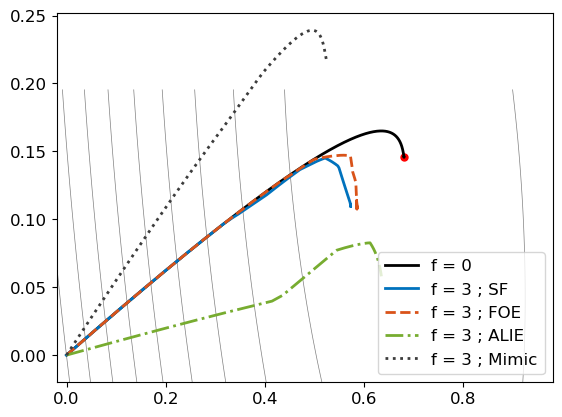

In [12]:
origin = 'lower'
fig1, ax2 = plt.subplots()
CS = ax2.contourf(x_, y_, z, 20, origin=origin, colors = 'white')

CS2 = ax2.contour(CS, levels=CS.levels[::2], colors='grey', origin=origin, linewidths=0.5)

# cbar.ax.set_ylabel('verbosity coefficient')

plt.plot(theta_star[0], theta_star[1], marker = '.', color = 'red', markersize=10)

plt.plot(parameters[:,0], parameters[:,1], linewidth=2, linestyle='-', color = 'black', label = 'f = 0')
plt.plot(parameters1[:,0], parameters1[:,1], linewidth=2, linestyle=tab_sign[0], color = colors[0], label='f = 3 ; '+tab_attack_name[0])
plt.plot(parameters2[:,0], parameters2[:,1], linewidth=2, linestyle=tab_sign[1], color = colors[1], label='f = 3 ; '+tab_attack_name[1])
plt.plot(parameters3[:,0], parameters3[:,1], linewidth=2, linestyle=tab_sign[2], color = colors[2], label='f = 3 ; '+tab_attack_name[2])
plt.plot(parameters4[:,0], parameters4[:,1], linewidth=2, linestyle=tab_sign[3], color = colors[3], label='f = 3 ; '+tab_attack_name[3])

plt.legend(loc='lower right')
plt.savefig('convergence.pdf')